<a href="https://colab.research.google.com/github/mandresblanco/tests_/blob/main/Density_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Import style class from matplotlib and use that to apply ggplot styling
from matplotlib import style
style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
# Let’s create a bunch of points around three centers in a 3D
# space X has those points and we can ignore y
centers = [[1,1,1],[5,5,5],[3,10,10]]
X, y = make_blobs(n_samples = 100, centers = centers, cluster_std = 2)
# Perform clustering using MeanShift algorithm
ms = MeanShift()
ms.fit(X)

# “ms” holds the model; extract information about clusters as
# represented by their centroids, along with their labels
centroids = ms.cluster_centers_
labels = ms.labels_
print(centroids)
print(labels)

[[ 3.74872992  7.70115162  7.53236224]
 [ 2.20301943  1.46924384  1.41388785]
 [ 2.44710541  7.16332717 -4.9104403 ]]
[1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 2 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0]


Number of estimated clusters: 3


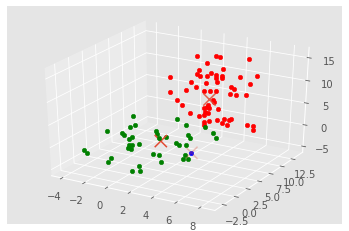

In [35]:
# Find out how many clusters we created
n_clusters_ = len(np.unique(labels))
print('Number of estimated clusters:', n_clusters_)
# Define a colors array
colors = ['r','g','b','c','k','y','m']
# Let’s do a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop to go through each data point, plotting it on the 3D space
# with a color picked from the above list – one color per cluster
for i in range(len(X)):
    # print('Coordinate:', X[i], 'Label:', labels[i])
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(centroids[:,0],centroids[:,1],centroids
[:,2], marker='x', s=150, linewidths=5, zorder=10)
plt.show()